## - 데이터 분석 & 데이터 시각화

## 2. 데이터 시각화
데이터 시각화란 데이터 분석의 결과를 사람이 쉽게 이해할 수 있도록 도표등의 수단을 통해 정보를 명확하고 효과적으로 전달하는 것을 말합니다.



In [1]:
# 런타임 접속
# (1)미리 조교가 준비해 둔 데이터파일을 다운받습니다. house_price.zip이라는 파일이 다운받아집니다.
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1UTQ6r2-_OGOF6VMx7WK4jgQoU7cTeuMe' -O house_price.zip

--2023-07-06 07:44:43--  https://docs.google.com/uc?export=download&id=1UTQ6r2-_OGOF6VMx7WK4jgQoU7cTeuMe
Resolving docs.google.com (docs.google.com)... 172.217.25.174, 2404:6800:400a:80c::200e
Connecting to docs.google.com (docs.google.com)|172.217.25.174|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7tp165qtph0mlun3adijlurcc92oc396/1688629425000/17258407129288051967/*/1UTQ6r2-_OGOF6VMx7WK4jgQoU7cTeuMe?e=download&uuid=f3c1ea4c-0315-4310-a54b-85d3e4a0bc73 [following]
--2023-07-06 07:44:44--  https://doc-00-b4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7tp165qtph0mlun3adijlurcc92oc396/1688629425000/17258407129288051967/*/1UTQ6r2-_OGOF6VMx7WK4jgQoU7cTeuMe?e=download&uuid=f3c1ea4c-0315-4310-a54b-85d3e4a0bc73
Resolving doc-00-b4-docs.googleusercontent.com (doc-00-b4-docs.googleusercontent.com)... 142.250.206.225, 2404:6800:400a:80e::

In [2]:
# 압축을 해제하고, house_price라는 폴더에 저장합니다.
!unzip house_price.zip -d house_price

Archive:  house_price.zip
  inflating: house_price/data_description.txt  
  inflating: house_price/sample_submission.csv  
  inflating: house_price/test.csv    
  inflating: house_price/train.csv   


In [2]:
#Data 설명을 매번 읽어오는일은 번거로운 일이다. dictionary형태로 저장하고 원할때마다 정보를 읽어오는 코드를 작성해보자
with open('house_price/data_description.txt', 'r') as f:
    alldata = f.readlines()
    f.close()

help_data = dict()
title = ''
des   = ''
for line in alldata:
    if line[0].isalpha() or line[0].isdigit():
        if title != '':
            if title == "Bedroom":
                title = "BedroomAbvGr"
            if title == "Kitchen":
                title = "KitchenAbvGr"
            help_data[title.lower()] = des
            des = ""
        
        title = line.split(':')[0]
    des += line

help_data[title.lower()] = des
help_data["saleprice"] = "SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict."

def show_data(key):
    if key.lower() in help_data.keys():
        print(help_data[key.lower()])
    else:
        print("오타가 있습니다! 존재하지 않는 항목을 입력하셨습니다.")

In [3]:
##show_data실험
show_data('mssubclass')

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES




In [4]:
# 시각화에 필요한 라이브러리를 불러옵니다.
## 다른 프로그램의 구성 요소를 사용하기 위해 미리 만들어 둔 프로그램 조각 
import numpy as np # linear algebra....
import pandas as pd 
%matplotlib inline
from matplotlib import pyplot as plt #Visualization of the data....
from mpl_toolkits import mplot3d
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
## os module에서 파일 및 디렉토리를 탐색하는 방법
import os
os.listdir('house_price')

['test.csv',
 '.ipynb_checkpoints',
 'sample_submission.csv',
 'data_description.txt',
 'train.csv']

In [6]:
#파일을 불러오고 파일의 일부를 보여줍니다.(Method)
df_train=pd.read_csv("house_price/train.csv")

In [18]:
# 데이터엔 어떤 항목이 있는지 볼까요?
print("데이터 항목 리스트:\n",df_train.columns)

데이터 항목 리스트:
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond'

In [16]:
df_train.head() ## 개수, tail, 특정 column만

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
# 데이터 개수가 몇개인지, 데이터 속성의 개수가 몇개인지 등 데이터가 어떻게 생겼는지 볼까요?
print(len(df_train),len(df_train.columns))
print("(데이터 개수,데이터의 Feature의 개수):",df_train.shape)

1460 81
(데이터 개수,데이터의 Feature의 개수): (1460, 81)


In [13]:
# 데이터의 대략적인 구조를 보여줍니다.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot: >

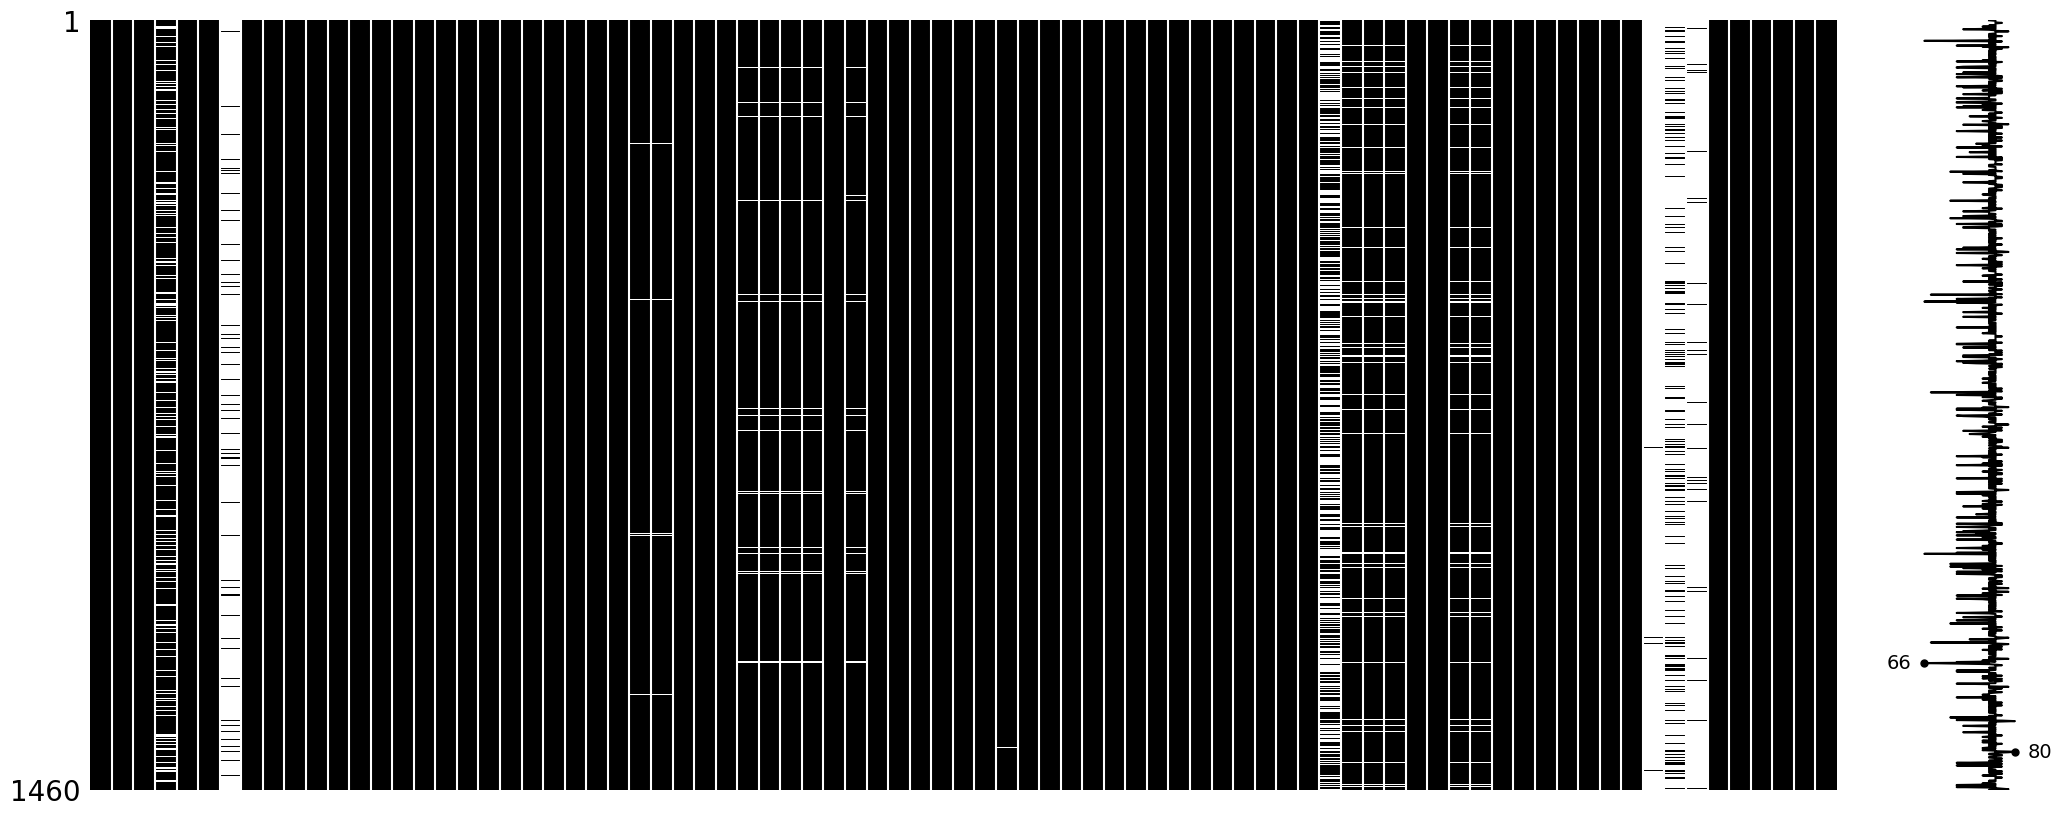

In [23]:
# 데이터에는 항상 결측값이 존재합니다. 데이터가 없는 부분을 시각화해봅시다!
import missingno as mn
mn.matrix(df_train,color=(0,0,0))

<AxesSubplot: >

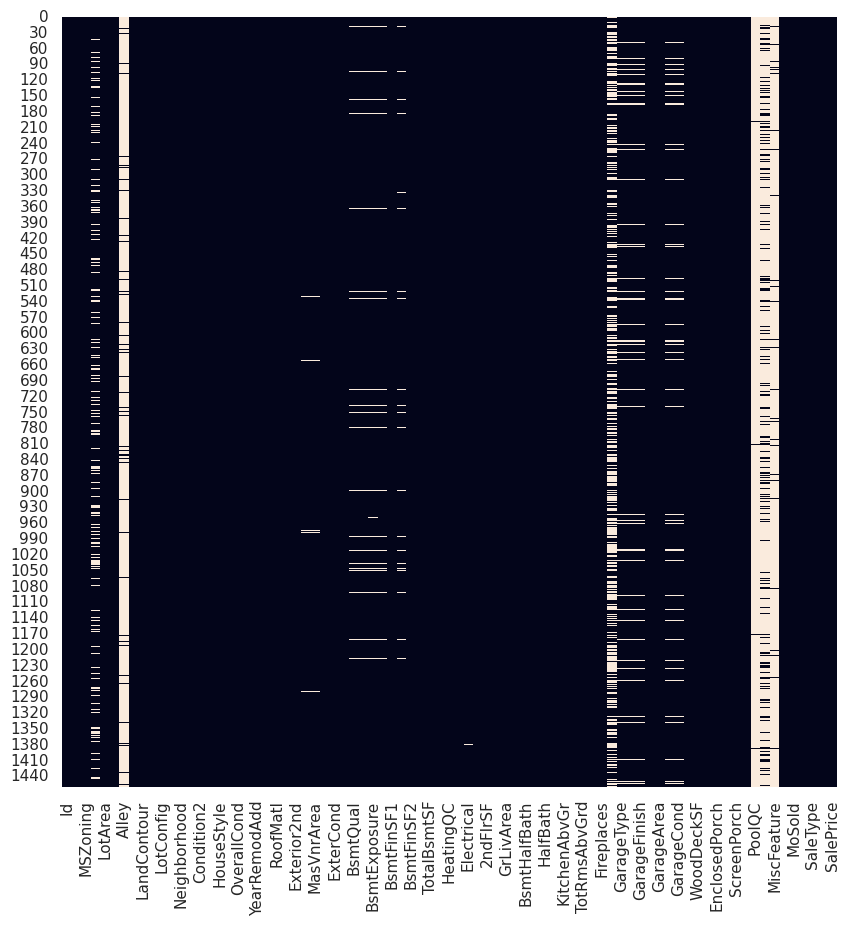

In [24]:
## sns.heatmap(df_train.corr(),annot=True)
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(df_train.isnull(),cbar=False)

<AxesSubplot: >

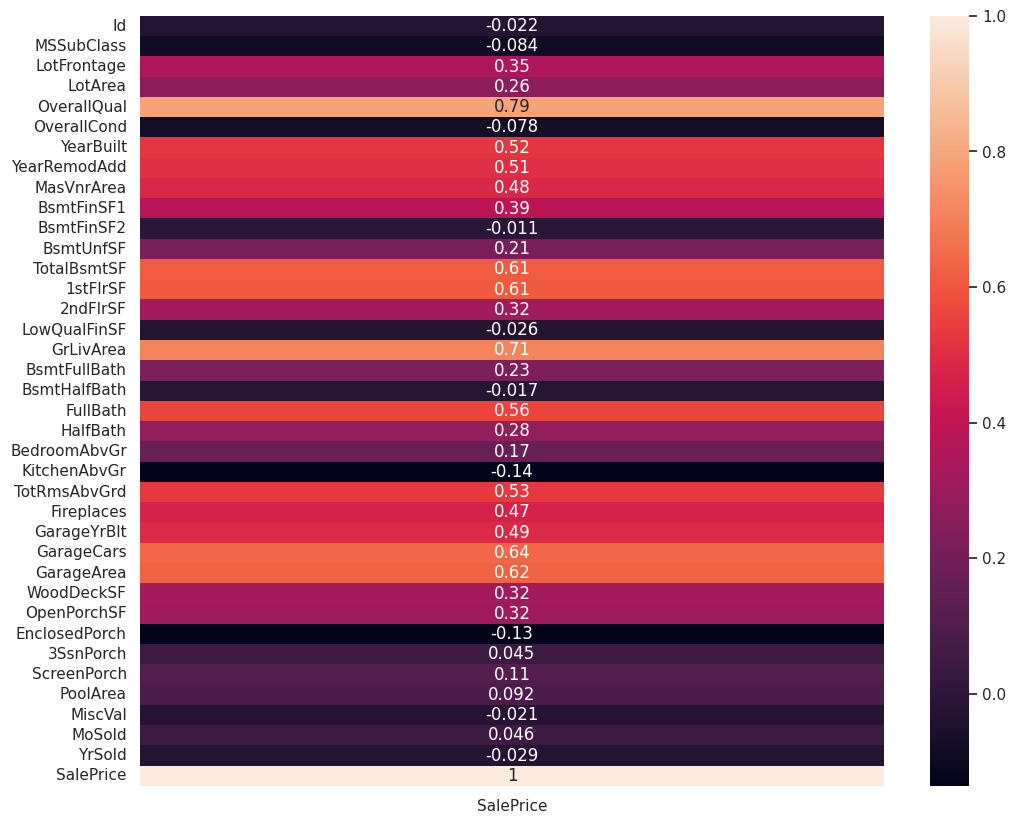

In [21]:
# 전체 heatmap 확인 : sns.heatmap(df_train.corr())
# 특정 항복 GarageCars와 연관성 찾기
# sns.heatmap(df_train.corr()[['SalePrice']],annot=True)

In [26]:
# 다운받았던 데이터의 항목별 결손 비율이 어느정도인지 확인합니다.
test_list = []
for features in df_train.columns:
  if df_train[features].isnull().sum()>=1:
    test_list.append(features)

for i in test_list:
  print(i,round(df_train[i].isnull().mean(),4),'% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
Electrical 0.0007 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


In [27]:
# 다운받았던 데이터의 항목별 결손 비율이 어느정도인지 확인합니다.(ListComprehension) 코드 간결화
features_with_na=[features for features in df_train.columns if df_train[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(df_train[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
Electrical 0.0007  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


In [28]:
# 결측이 존재하는 항목을 모두 제거해줍시다. (결측 데이터는 추후 에러의 원인이 될 수 있습니다.)
# 제거 방식 예시를 통해서 보여주기
df_train = df_train.dropna(axis=1)
## 그 axis=1을 통해 열값을 삭제 (예시 보여주기)
# 제거가 잘되었는지 확인해볼까요?
df_train.info()
# 기존 80-> 62개로 줄었습니다!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

In [29]:
## 추후 에러의 원인이 되는 결측값(Null)값 제거와 DataFrame 분석을 완료! 세부적인 분석을 시작(수치형 데이터와 범주형 데이터 설명하기)
# 수치형 항목을 뽑아내봅시다.
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']
# 수치형 항목의 개수는 35개네요.
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  35


In [30]:
# 어떤 수치형 항목들이 있는지 표로 확인해봅시다.
df_train[numerical_features].head().style.set_properties(**{"background-color": "#98FB98","color": "black", "border-color": "black"})

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [31]:
# 수치형 항목중, 특히 제가 궁금한 정보 연도와 관련된 항목을 뽑아봅시다.
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
# 어떤 항목이 있을까요?
year_feature

['YearBuilt', 'YearRemodAdd', 'YrSold']

In [32]:
# 각각이 어떤 값인지 설명을 봐봅시다.
for f in year_feature:
    show_data(f)

YearBuilt: Original construction date


YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)


YrSold: Year Sold (YYYY)




In [33]:
# 각 연도 항목에는 어떤 데이터들이 존재할까요?
for feature in year_feature:
    print(feature, sorted(df_train[feature].unique()),end='\n\n')

YearBuilt [1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900, 1904, 1905, 1906, 1908, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]

YearRemodAdd [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 20

<AxesSubplot: xlabel='YrSold'>

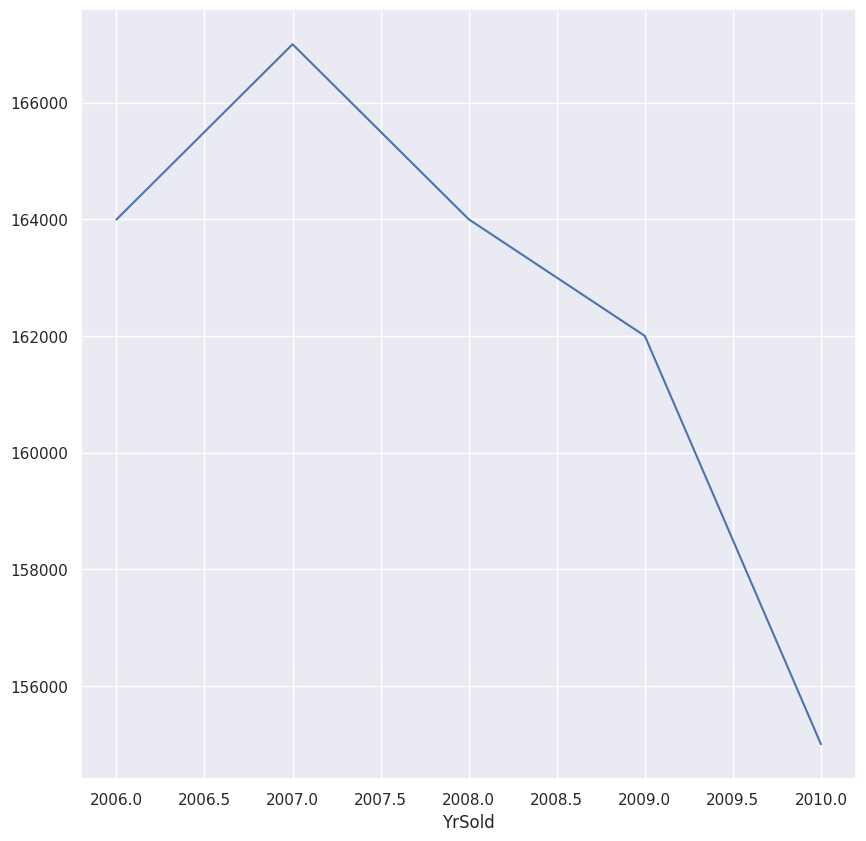

In [34]:
df_train.groupby('YrSold')['SalePrice'].median().plot()

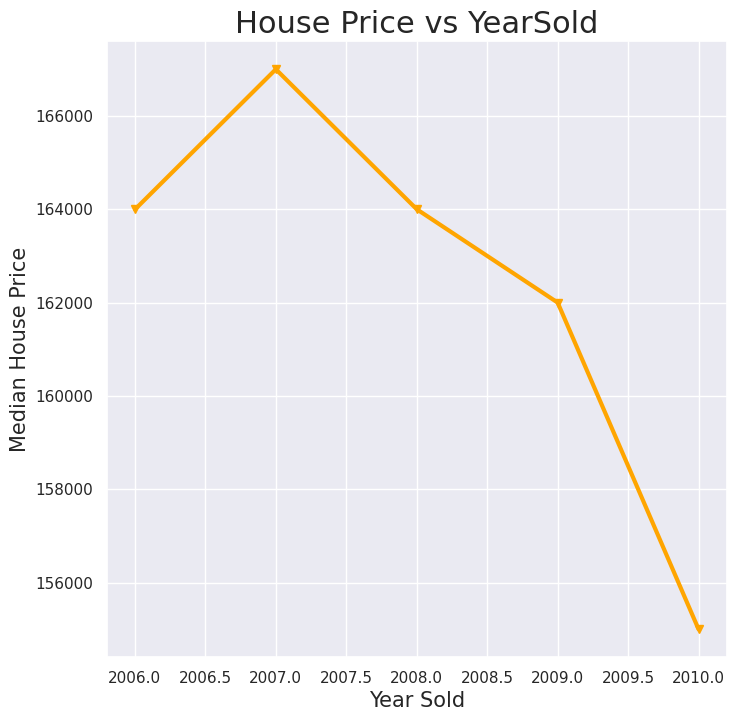

In [35]:
# 특정 항목(yrSold,yearRemodAdd,YrSold)과, 집값(SalePrice)과의 연관성을 그래프로 확인해봅시다!
# 적절한 값을 통해, 도표의 크기(가로, 세로)를 정할 수 있습니다.  / 공식 홈페이지 확인
plt.figure(figsize=(8,8))
# Groupby함수를 통해 YrSold(Year Sold) 항목과, 판매가격('SalePrice') 두가지의 연관관계를 나타내 봅시다.
df_train.groupby('YrSold')['SalePrice'].median().plot(color = "orange",linestyle = "-",linewidth=3,marker='v')
## color,linestyle,linewidth,marker
# 원하신다면, 'YrSold' 부분과 'SalePrice' 부분을 다른항목으로 변경하여 관계성을 확인할 수 있습니다.
plt.xlabel('Year Sold',fontsize = 15)
# # x축에 Year Sold라고 표시합니다.
plt.ylabel('Median House Price',fontsize =15)
# # y축에 Median House Price라고 표시합니다.
plt.title("House Price vs YearSold",fontsize=22)
# 도표의 제목을 짓습니다.
plt.show()

<AxesSubplot: xlabel='YrSold', ylabel='SalePrice'>

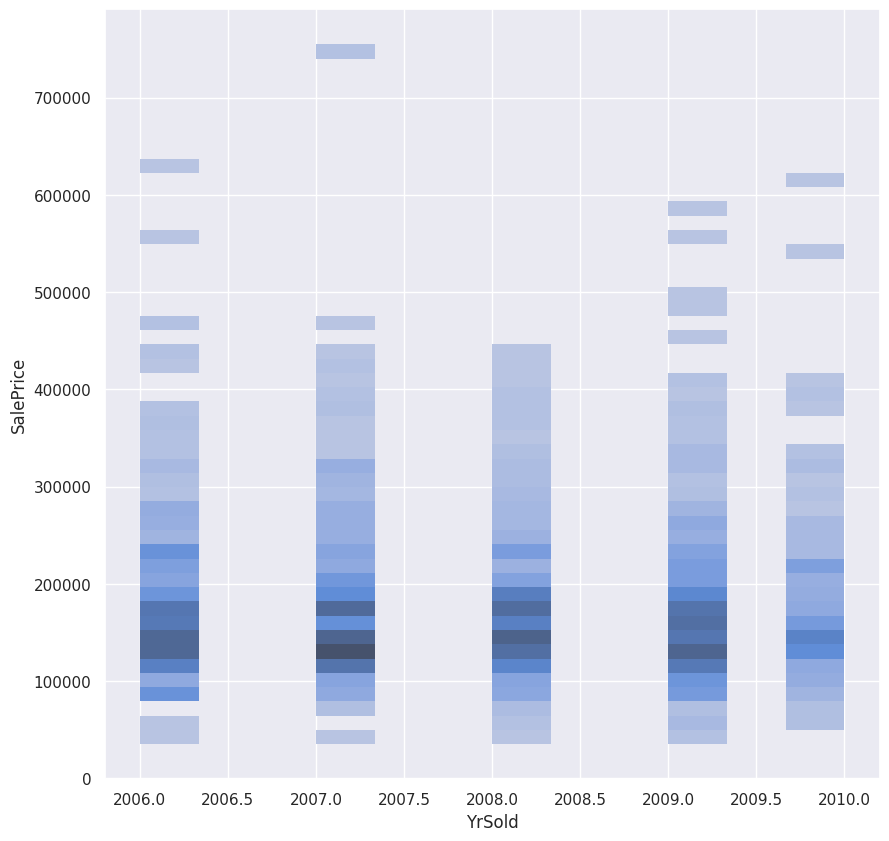

In [36]:
## Seaborn histplot으로 대략적인 그림 보이기 [data,x,y] 
sns.histplot(data=df_train,x='YrSold',y='SalePrice')

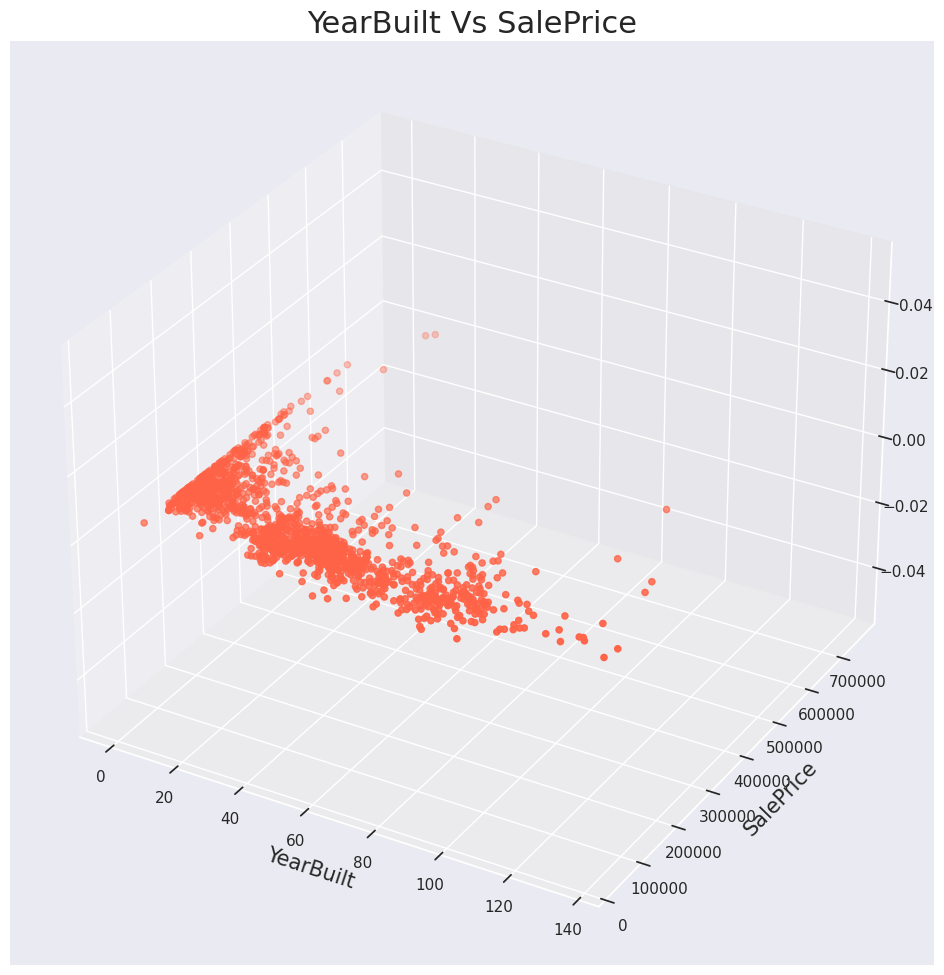

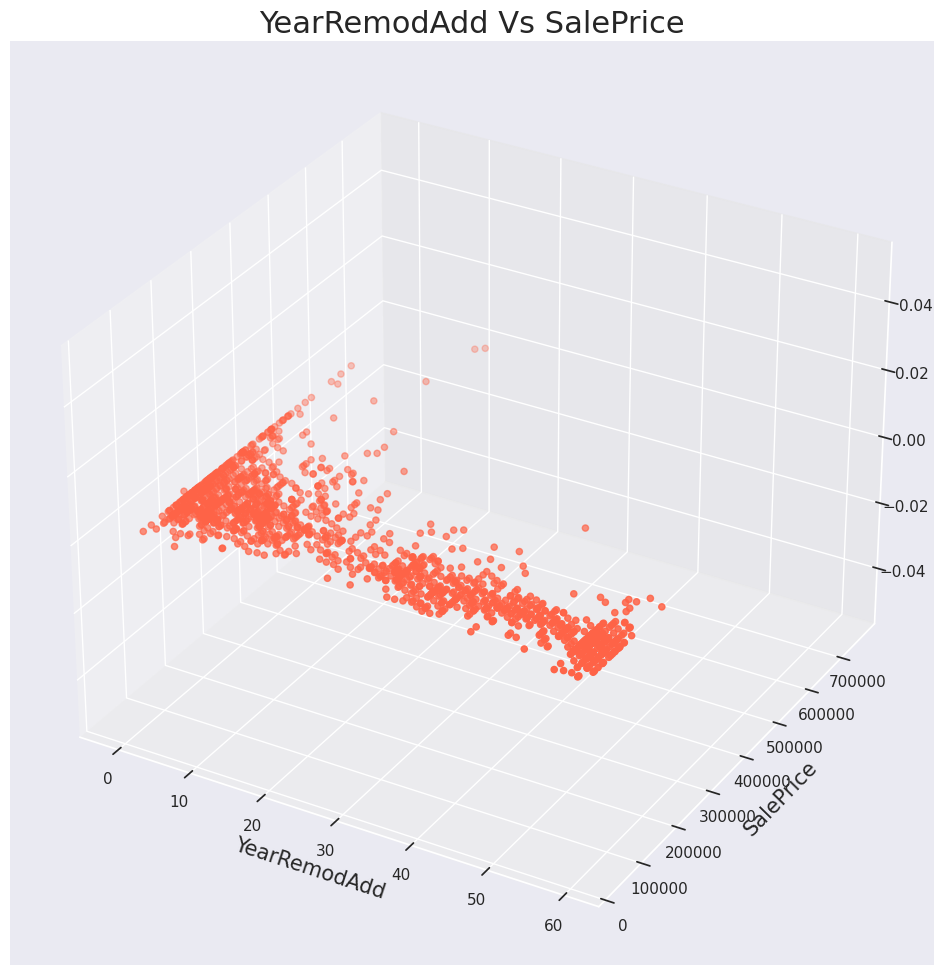

In [37]:
## 이제 더 직관적인 연관관계를 파악하기 위해 3차원으로 그래프를 그려봅시다!

for feature in year_feature:
    # Year Sold를 제외한 나머지
    if feature!='YrSold':
        data=df_train.copy()
        data[feature]=data['YrSold']-data[feature]
        # 3차원 그림을 그려봅시다!
        fig = plt.figure(figsize = (12, 12))
        # 3d로 axes를 지정합니다!
        ax = plt.axes(projection ="3d")
        ax.scatter3D(data[feature],data['SalePrice'],color="tomato")
        plt.title(feature  +  " Vs SalePrice",fontsize = 22)
        plt.xlabel(feature,fontsize = 15)
        plt.ylabel('SalePrice',fontsize = 15)
        plt.grid(color="palegreen")
        plt.show()

# Discrete Feature

# 연속적이지 않은 값과 집값과의 관계 분석을 해봅시다.(화장실 갯수, 욕조 갯수 등등)


In [38]:
# 본 Dataset에서 화장실의 개수와 같은 Discrete Feature는 1, 2, 3, 4, 5 등으로 값이 딱 떨어지므로, 중복을 제외했을 때 unique 값이 총 25를 넘지 않습니다. 
# (예를 들어, 대부분의 집은 화장실의 개수가 대부분 1,2,3,4개 정도의 4가지 경우의 수로 끝나지, 25가지 이상의 경우의수가 존재하지 않습니다.)
# 따라서, unique한 값의 개수가 25 미만인 값들을 discrete로 처리합니다.
# (반면에, continuous (연속적 값), 예를 들어 집의 평수, 수영장의 넓이, 마당의 넓이 등은 1,2,3처럼 딱 떨어지지않고, 1.1 1.2 1.3과 같이 무수히 많은 unique 값을 가지겠죠?)
discrete_feature=[feature for feature in numerical_features if len(df_train[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [39]:
# 각각이 어떤 값인지 설명을 봐봅시다.
for f in discrete_feature:
    show_data(f)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES


OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	

OverallCond: Rates the overall co

미국의 주택문화는 아파트에 주로 사는 우리 나라와 달라서, 지상층 / 지하층 유무를 굉장히 중요시 여깁니다.  
BsmtFullBath항목 : 지하층에 있는 Full Bath의 개수  
(FullBath : 샤워시설, 변기가 함께 존재), (HalfBath : 샤워시설 없이 화장실만)  
FullBath항목  : 지상층에 있는 Full Bath의 개수  
뒤에 AbvGr, AbvGrd가 붙은 데이터는 Above Grade라는 뜻으로, 지상층이라고 생각하시면 됩니다.

# 지상에 위치한 FullBath와 집값의 연관관계를 확인해봅시다!

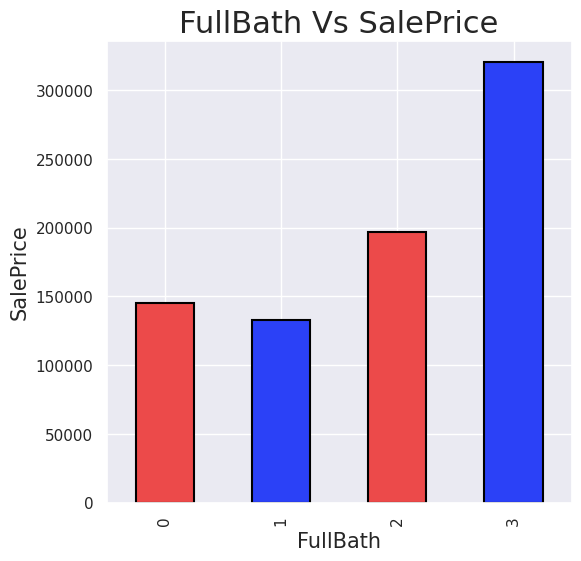

In [40]:
#먼저 데이터를 복사해옵니다. (원치 않는 데이터 조작을 방지하기 위함)
data=df_train.copy()

# 차트의 색깔을 정할 수 있습니다. 
# https://htmlcolorcodes.com/ 
# 원하는 컬러의 차트를 그려보세요!
colors = ["#EC4A4A","#2B41F7"]
#기본값, 빨강, 초록
plt.figure(figsize = (6, 6))
data.groupby('FullBath')['SalePrice'].median().plot.bar(color=colors,edgecolor = "black",linewidth=1.5)
# Full Bath 데이터항목과 SalePrice와의 연관관계를 차트로 나타냅니다.
# mean이 아닌 median()을 쓰는 이유는 중앙값이 가장 경향성을 잘 보여주는 지표이기 때문입니다.
'''
    수업 내용
    mean(통계의 함정) : 미국에서 가장 평균 연봉이 높은 학과는 어디일까요? 
    법학과, 컴퓨터학과, 전자과, 의예과 등등을 생각하시겠지만, 사실 의외로 지리학과가 평균 연봉 1억2천만원으로 가장 높게 산정되었습니다.
    그 이유는 뭘까요? 정말 지리학과의 모든 사람들이 그만큼 돈을 벌까요?
    이유는 굉장히 간단합니다. 지리학과 졸업생중 한명이 전설적인 농구선수 마이클 조던이기 때문입니다.
    마이클 조던의 연봉으로 인해, 지리학과 전체 평균이 어마어마하게 높아진 것이죠.
    이런걸 방지하기위해서, 항상 데이터간의 경향성을 살피기 위해서 우리는 평균이 아니라 median(중앙값) 혹은 최빈값을 사용합니다.
'''

plt.xlabel('FullBath',fontsize=15)
plt.ylabel('SalePrice',fontsize =15)
plt.title('FullBath' +" Vs SalePrice",fontsize = 22)
plt.show()

# 총 방의 개수와 집값의 연관관계를 확인해봅시다!

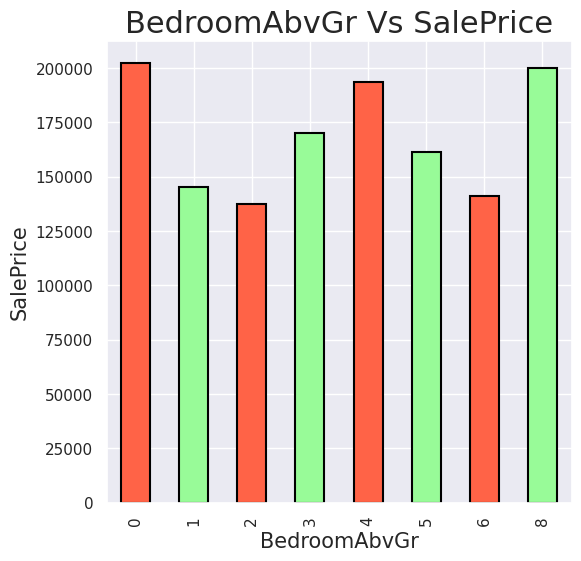

In [41]:
data=df_train.copy()
colors = ["#FF6347","#98FB98"]
target = 'BedroomAbvGr' # 매번 Feature이름을 바꾸는것은 매우 귀찮은 일입니다. 코드 재사용성을 높이기 위해서, Target이라는 변수에 연관관계를 확인하고싶은 항목을 넣어 사용해봅시다.
plt.figure(figsize = (6, 6))
data.groupby(target)['SalePrice'].median().plot.bar(color=colors,edgecolor = "black",linewidth=1.5)
plt.xlabel(target,fontsize=15)
plt.ylabel('SalePrice',fontsize =15)
plt.title(target +" Vs SalePrice",fontsize = 22)
plt.show()

# [TO-DO] 실습 #1  
그 외에 어떤 Discrete 데이터가 집값과 연관이 있을지 생각해보고, 코드를 작성하여 직접 확인해봅시다!

In [42]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

<AxesSubplot: xlabel='HalfBath', ylabel='FullBath'>

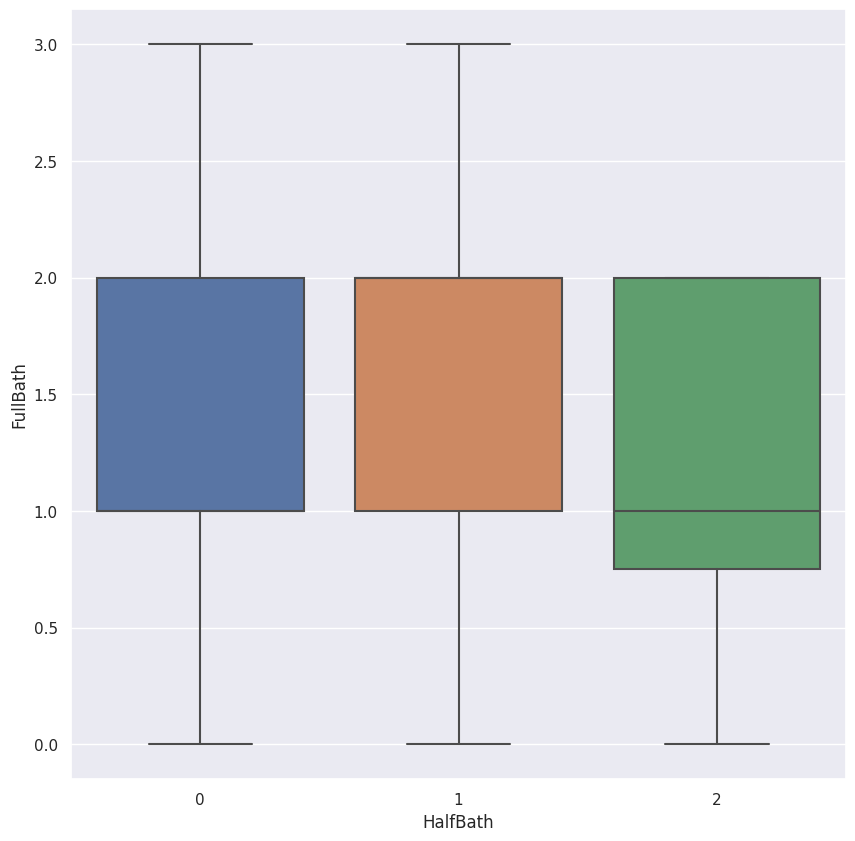

In [43]:
#sns.histplot(data=df_train,x='HalfBath',y='FullBath')
sns.boxplot(data=df_train,x='HalfBath',y='FullBath')

<AxesSubplot: xlabel='BedroomAbvGr'>

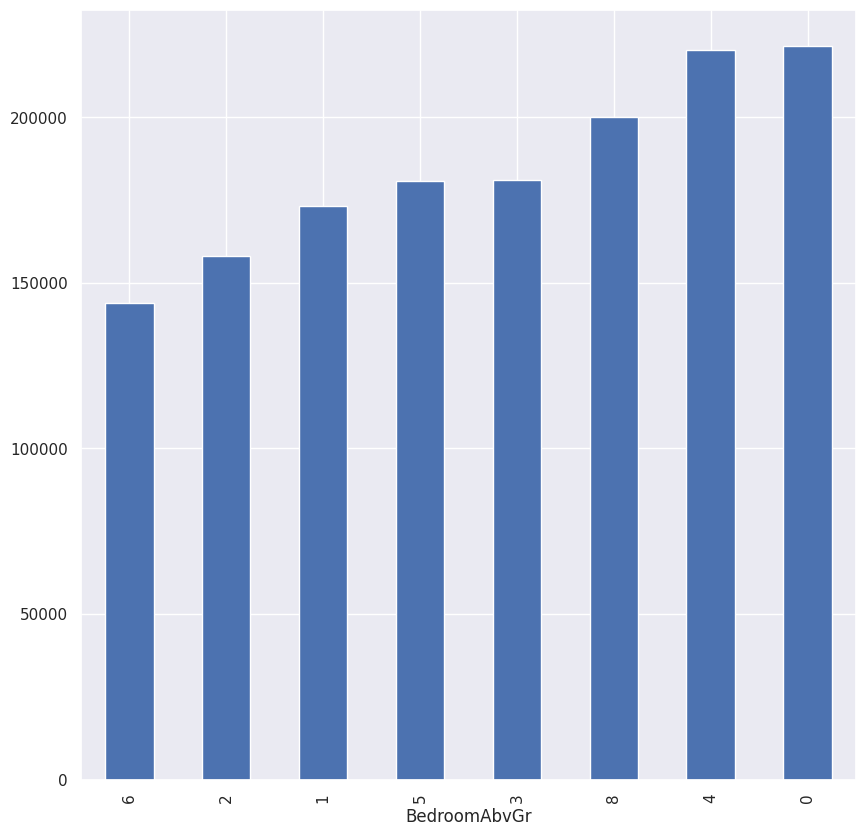

In [44]:
#data.groupby(target)['SalePrice'].median().plot.bar(color=colors,edgecolor = "black",linewidth=1.5)
# 정렬시켜서도 확인해보기 -> 아래 코드
data.groupby(target).mean()['SalePrice'].sort_values().plot.bar()

# 함수화
거의 구조가 똑같은 코드를 매번 반복적으로 입력하는것은 매우 비효율적입니다.  
Discrete Data와 가격 연관관계 그래프를 그리는 함수를 정의하고, 편하게 재사용해봅시다.

In [45]:
# 함수를 정의합니다. 
# target (연관관계 분석을 하고자 하는 항목)을 함수의 매개변수로 사용하여, 그래프를 그리는 함수입니다.
def draw_graph_discrete(target,x,y):
  data=df_train.copy()
  colors = ["#FF6347","#98FB98"]
  plt.figure(figsize = (x, y))
  data.groupby(target)['SalePrice'].median().plot.bar(color=colors,edgecolor = "black",linewidth=1.5)
  plt.xlabel(target,fontsize=15)
  plt.ylabel('SalePrice',fontsize =15)
  plt.title(target +" Vs SalePrice",fontsize = 22)
  plt.show()

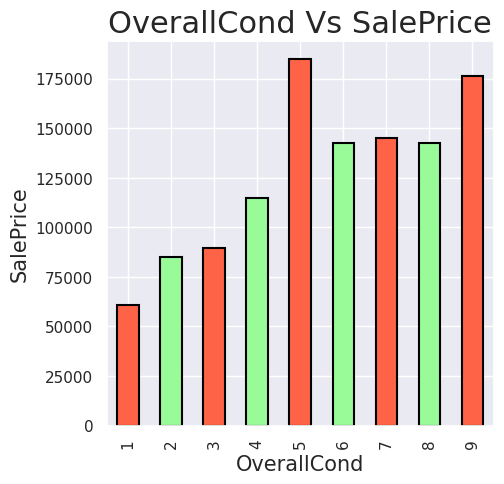

In [46]:
# 매우 간단하고 편하게 사용할 수 있습니다.
draw_graph_discrete('OverallCond',5,5)
## figsize x,y값도 매개변수로 받아보기

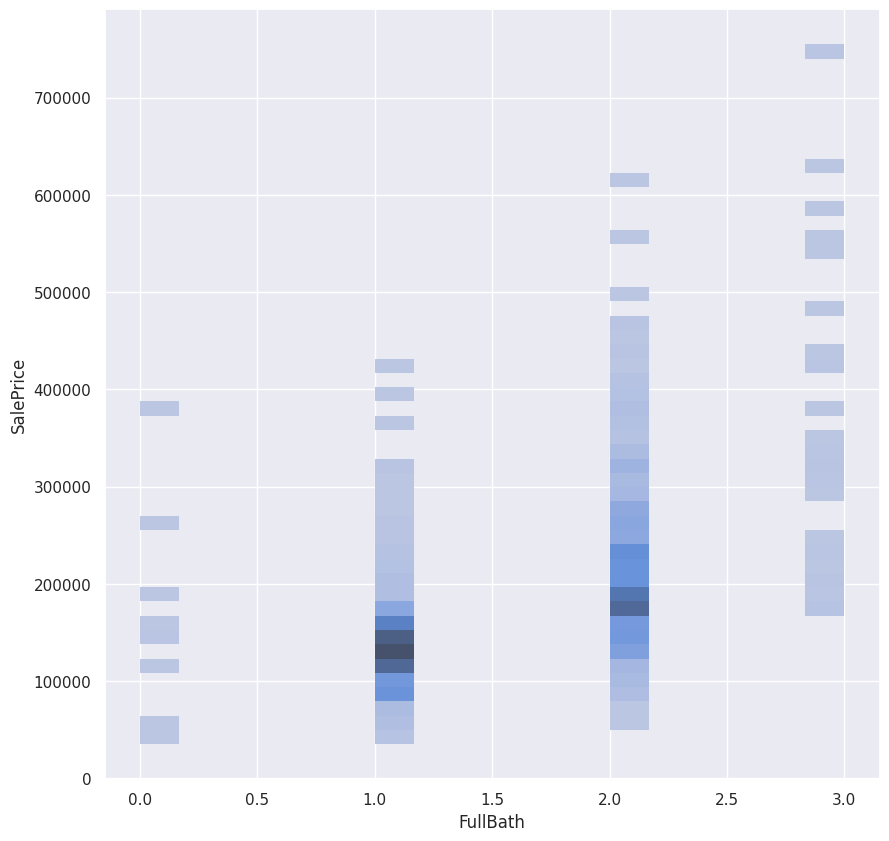

In [47]:
def draw_sns(target,x):
  if x=='hist':
    sns.histplot(data=df_train,x=target,y='SalePrice')
  else:
    sns.boxplot(data=df_train,x=target,y='SalePrice')
draw_sns('FullBath','hist')

# [TO-DO] 실습 #2
Discrete 데이터와 집값의 연관관계를 나타내는 함수를 정의했습니다.  
이를 활용하여 다시 한번 연관관계를 분석해봅시다.

In [48]:
#====================TODO======================
#  코드 작성 하는 곳 
#  위에 있던 함수를 적절히 활용해서 직접 그래프를 띄워봅시다.
#==============================================

# Continuous Feature (집의 넓이, 마당 평수와 같은 연속적인 값) 

In [49]:
# 전체 Feature 중에서, Numerical Feature면서, Discrete_Feature에 속하지 않는 데이터들을 추출합니다.
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))
# 총 개수는 14개네요!

Continuous feature Count 14


In [50]:
# 어떤 데이터가 있는지 살펴봅시다.
# 각각의 의미를 위의 데이터 설명표를 보고 확인해보세요!
# Bsmt는 Basement로 AbvGr와 반대의 의미, 즉 지하를 의미합니다.
# LotArea는 마당을 포함한 집 부지 전체의 넓이를 의미합니다.
# 1stFlrSF는 1층의 평수
# 2stFlrSF는 2층의 평수입니다.
continuous_feature

['LotArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [51]:
for f in continuous_feature:
  print(f)
  show_data(f)

LotArea
LotArea: Lot size in square feet


BsmtFinSF1
BsmtFinSF1: Type 1 finished square feet


BsmtFinSF2
BsmtFinSF2: Type 2 finished square feet


BsmtUnfSF
BsmtUnfSF: Unfinished square feet of basement area


TotalBsmtSF
TotalBsmtSF: Total square feet of basement area


1stFlrSF
1stFlrSF: First Floor square feet
 

2ndFlrSF
2ndFlrSF: Second floor square feet


GrLivArea
GrLivArea: Above grade (ground) living area square feet


GarageArea
GarageArea: Size of garage in square feet


WoodDeckSF
WoodDeckSF: Wood deck area in square feet


OpenPorchSF
OpenPorchSF: Open porch area in square feet


EnclosedPorch
EnclosedPorch: Enclosed porch area in square feet


ScreenPorch
ScreenPorch: Screen porch area in square feet


SalePrice
SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.


# 데이터의 분포를 살펴봅시다!

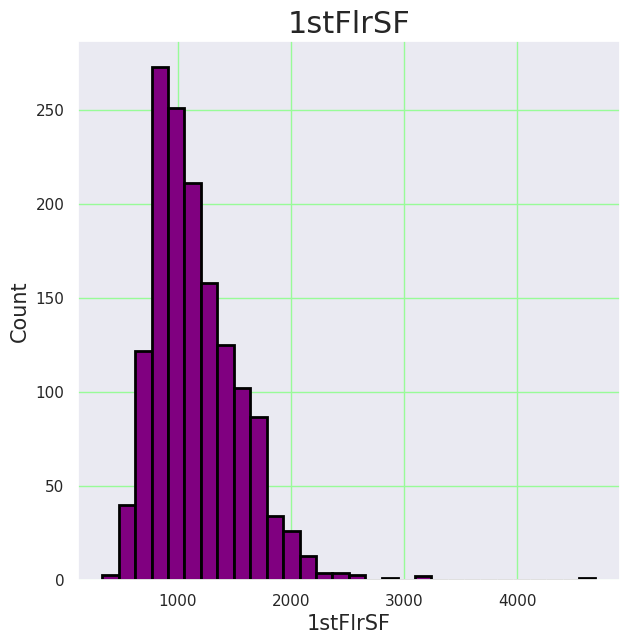

In [52]:
data=df_train.copy()
target = '1stFlrSF'
plt.figure(figsize = (7, 7))
data[target].hist(bins=30,color = "purple",edgecolor = "black", linewidth = 2) 
# bins의 숫자조절을 통해 막대 그래프의 개수를 조절할 수 있음
plt.xlabel(target, fontsize=15)
plt.ylabel("Count", fontsize=15) 
plt.title(target, fontsize = 22) 
plt.grid(color = "palegreen")
plt.show()

<AxesSubplot: xlabel='1stFlrSF', ylabel='Count'>

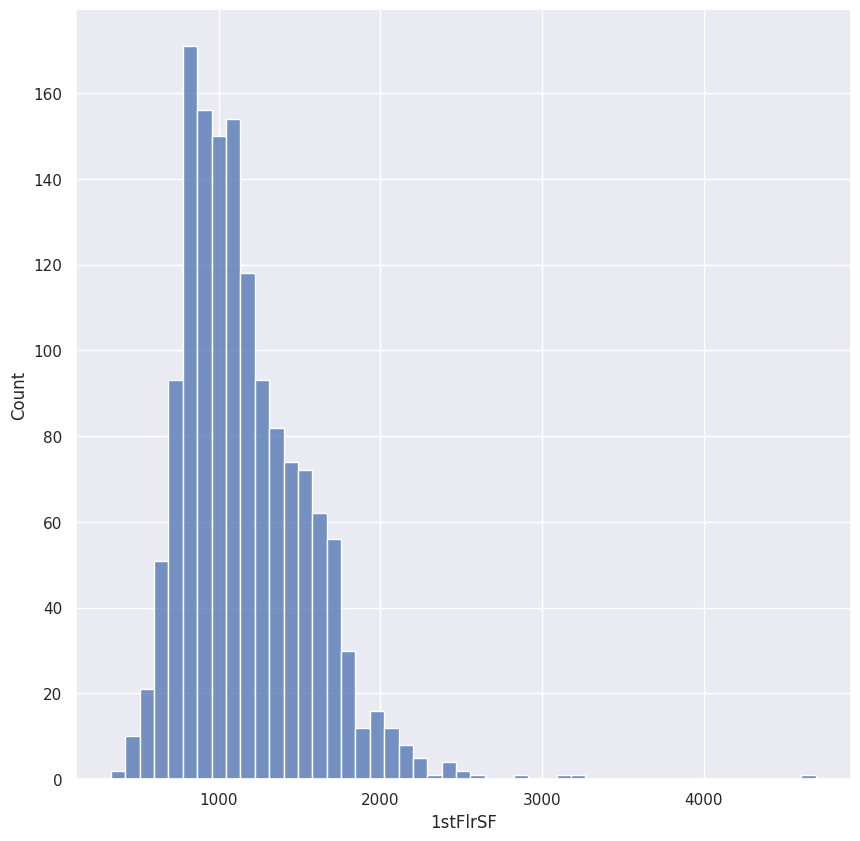

In [53]:
##seaborn library histplot그리기 [data,x]
sns.histplot(data=df_train,x='1stFlrSF')

# 반복문 활용
모든 데이터항목에 대해서 분포를 보고싶습니다.  
위와같은 코드에서 Feature를 바꿔가며 하나하나 출력하는 것은 너무 비효율적입니다.  
for문을 사용하여 한번에 모든 그래프를 출력해봅시다.

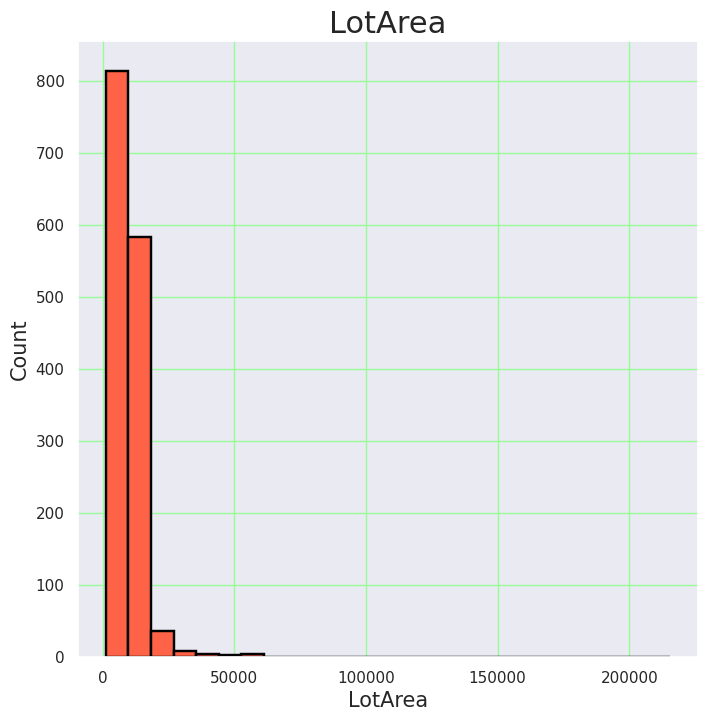

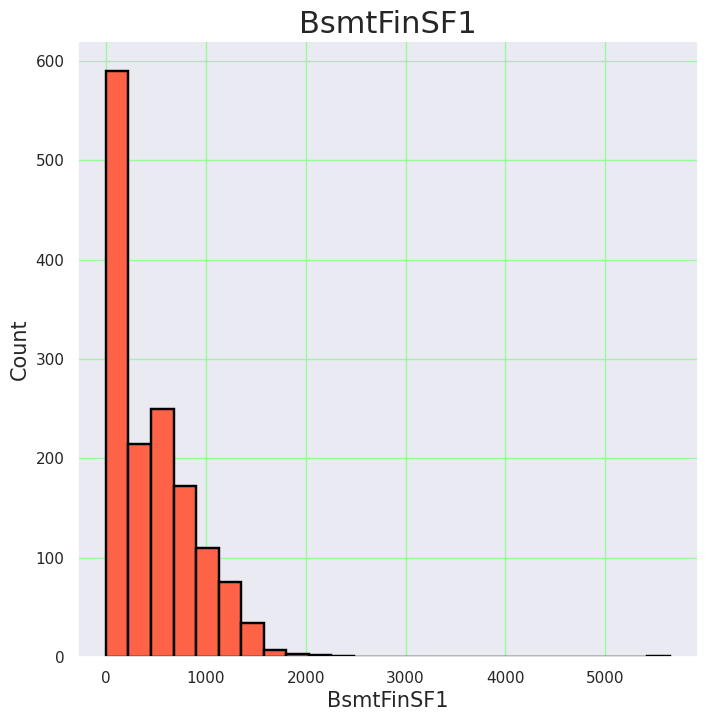

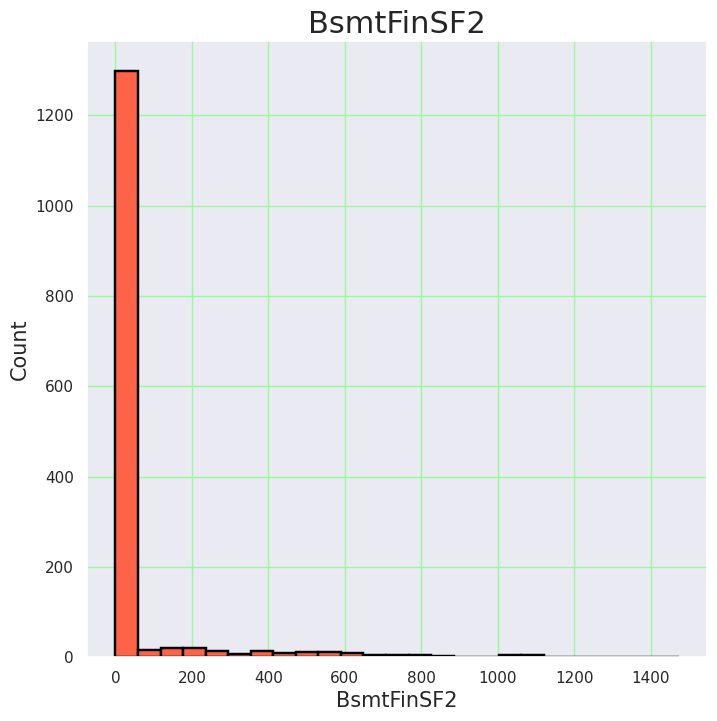

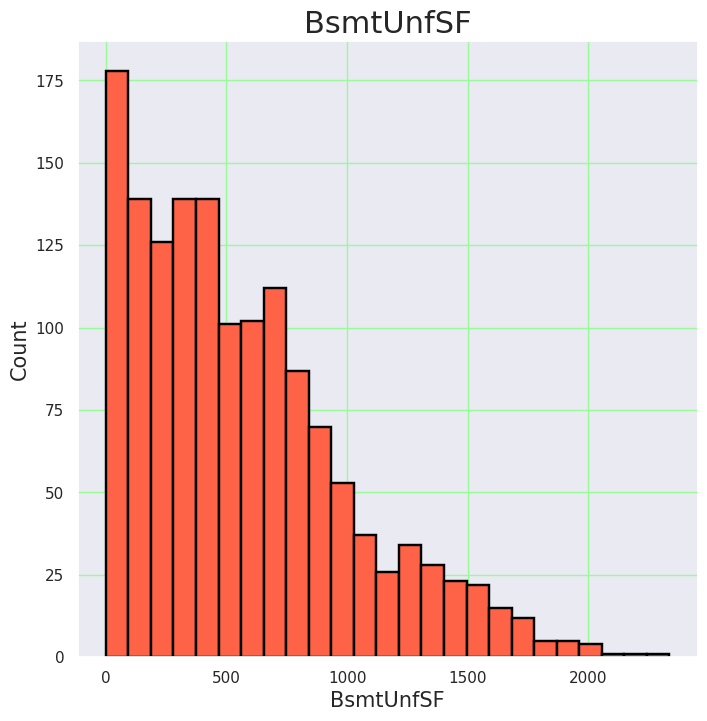

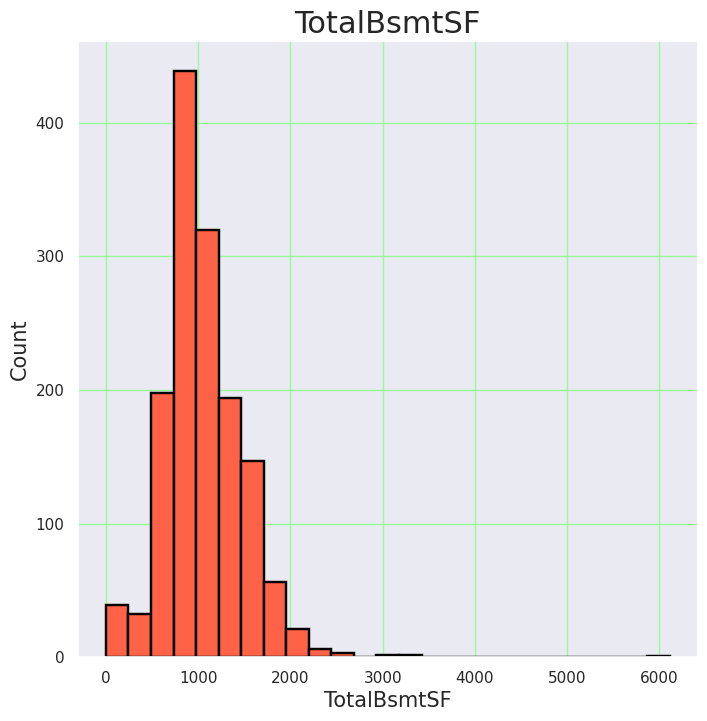

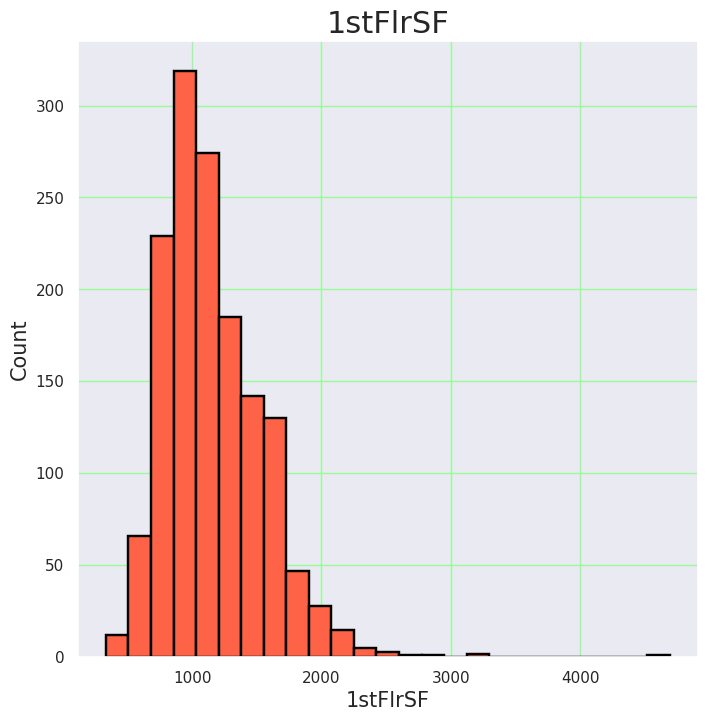

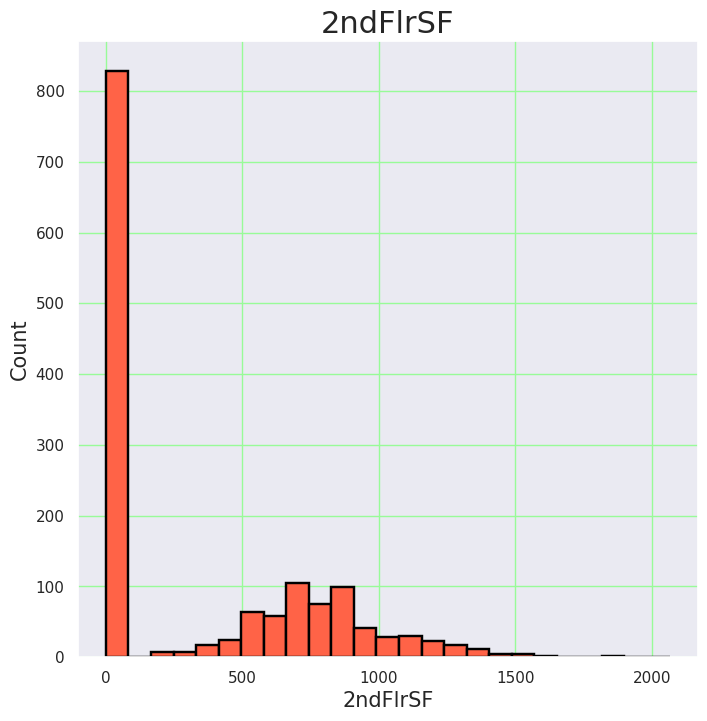

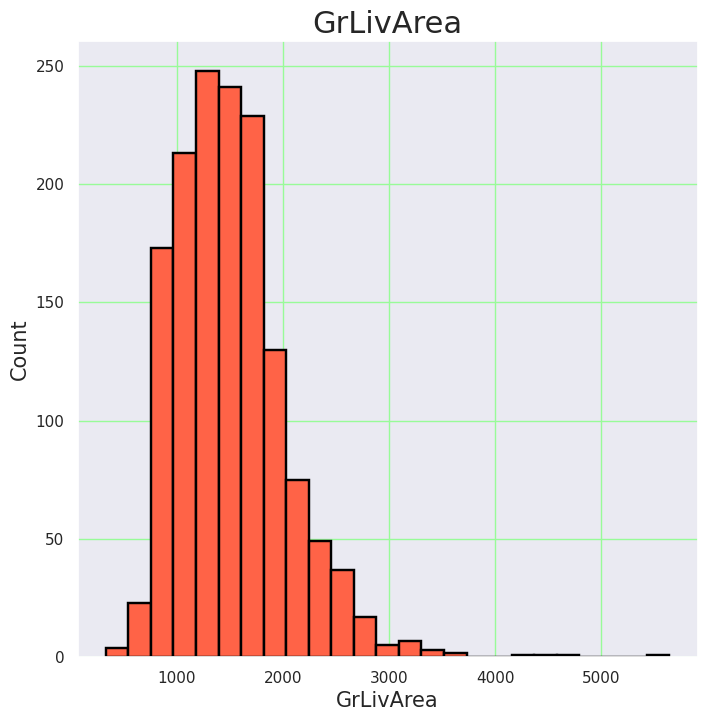

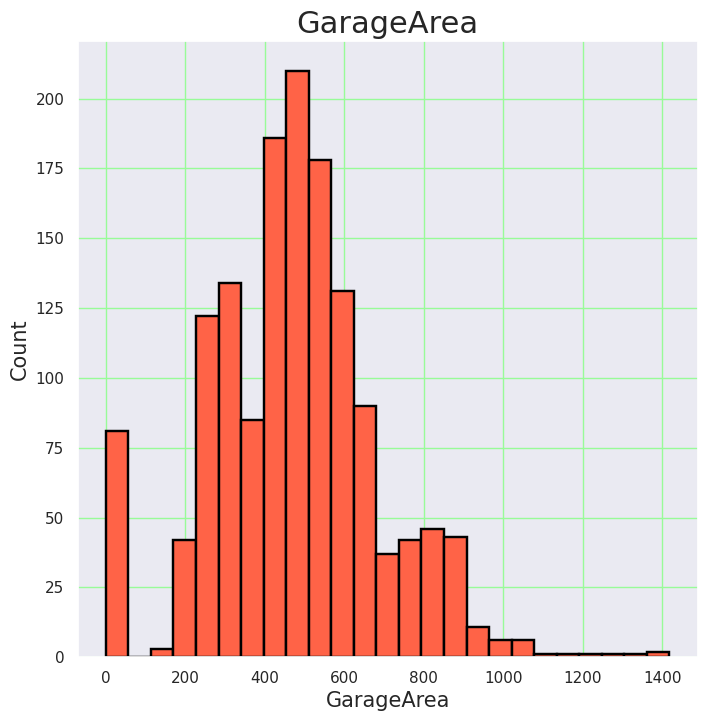

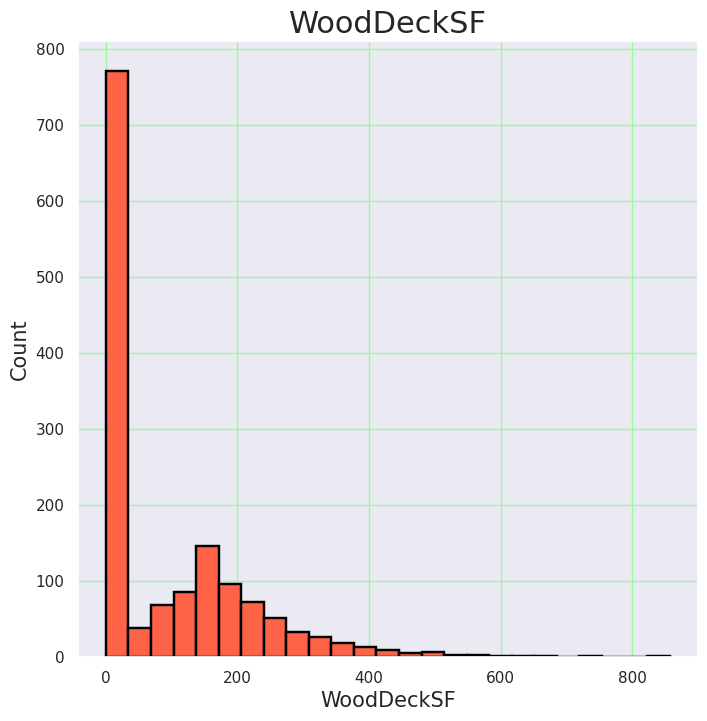

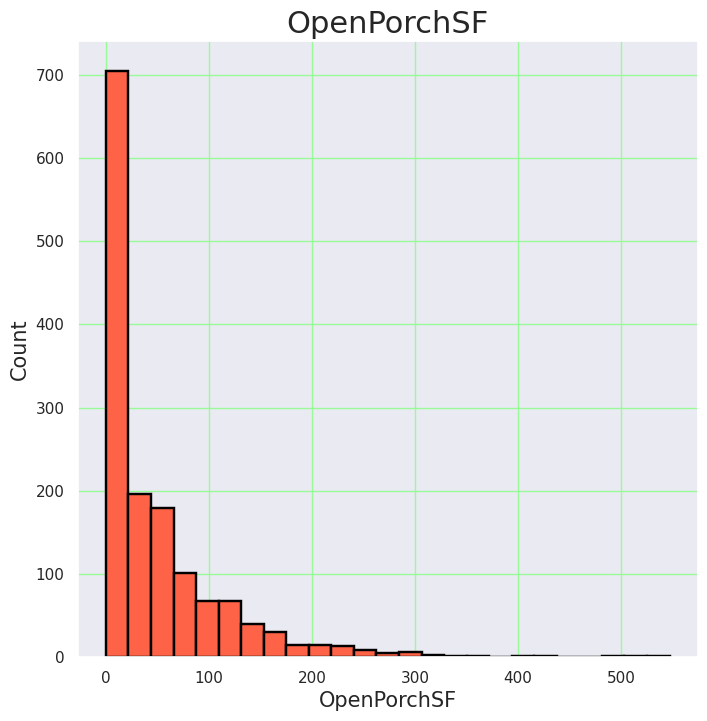

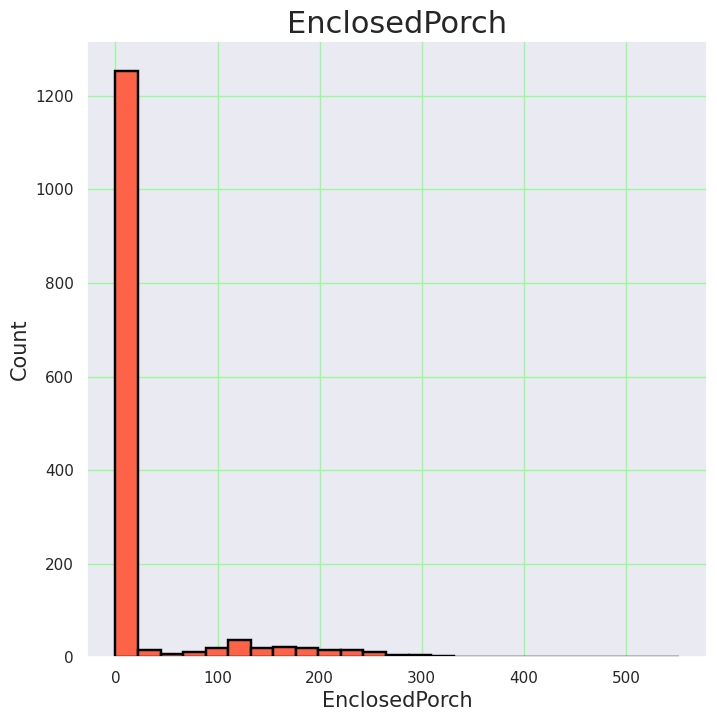

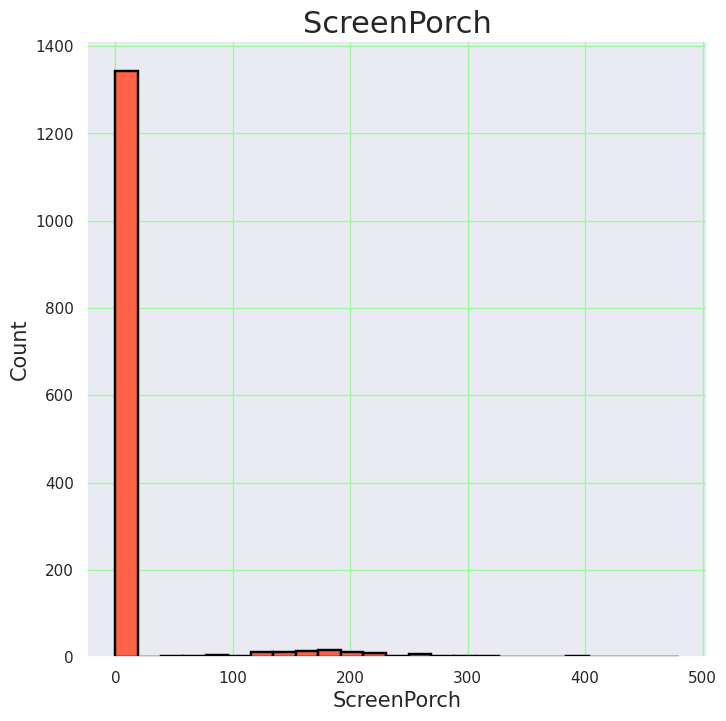

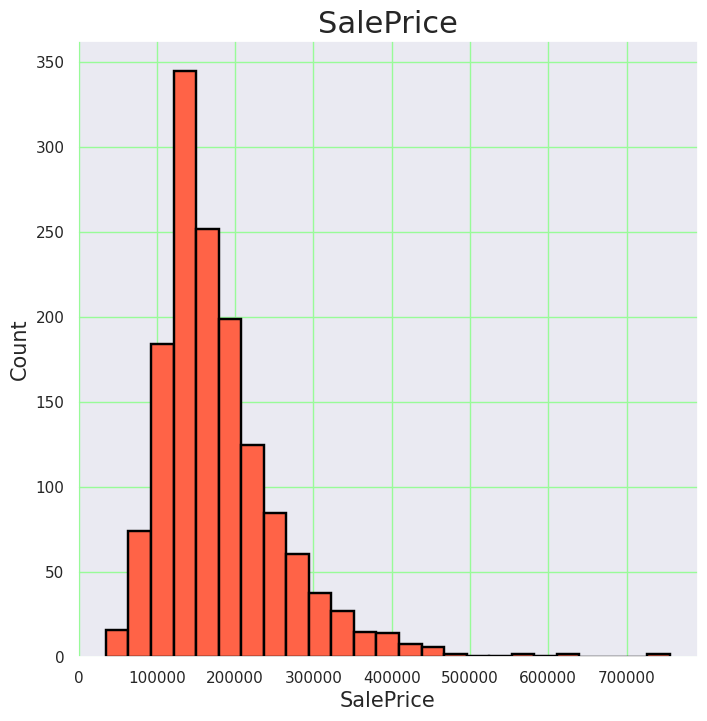

In [54]:
data=df_train.copy()
for target in continuous_feature:
    plt.figure(figsize = (8, 8))
    data[target].hist(bins=25,color = "tomato",edgecolor = "black", linewidth = 1.75) 
    plt.xlabel(target, fontsize=15)
    plt.ylabel("Count", fontsize=15) 
    plt.title(target, fontsize = 22) 
    plt.grid(color = "palegreen")
    plt.show()

# Feature Scaling
Feature의 분포는 보통 매우 다양합니다.  
예를 들어, 누군가는 5평짜리 집에 살 수도 있지만, 누군가는 1000평짜리 집에서 살기도 합니다.  
위 그래프만 보더라도, 매우 소수이지만, LotArea가 200000에 달하는 데이터가 존재합니다.
대부분의 데이터는 앞쪽에 편향되어 있는데 말이죠.  

이러한 데이터의 특성은, Feature간의 연관관계 분석에 큰 악영향을 미칩니다.  
최빈값, 중앙값, 평균값과의 차이가 너무 크기 때문인데요. 

이러한 현상을 방지하기 위해서, 빅데이터쪽에서는 Feature Scaling이라는 방법을 사용합니다.
Feature Scaling의 방법은 매우 다양합니다. 

첫째로, Min-Max Normalization(최소-최대 정규화)가 있습니다.  
<p align="center">
$ x_{scaled} = \frac{x - min}{max - min} $
</p>


둘째로는, Z-Score Normalization이 있습니다. 
<p align="center"> 
$ x_{z-scaled} = \frac{x - \mu}{\sigma}$
</p>

셋째로는, 단순히 log를 활용하여, 데이터 값을 최대한 압축시키는 방식입니다.  
<p align="center">
$ x_{logarithm} = \log(x)$
</p>
위와 같은 방법으로 데이터를 적절히 정규화해줍니다. 

# Continuous Data 연관관계 분석

<AxesSubplot: xlabel='FullBath', ylabel='Count'>

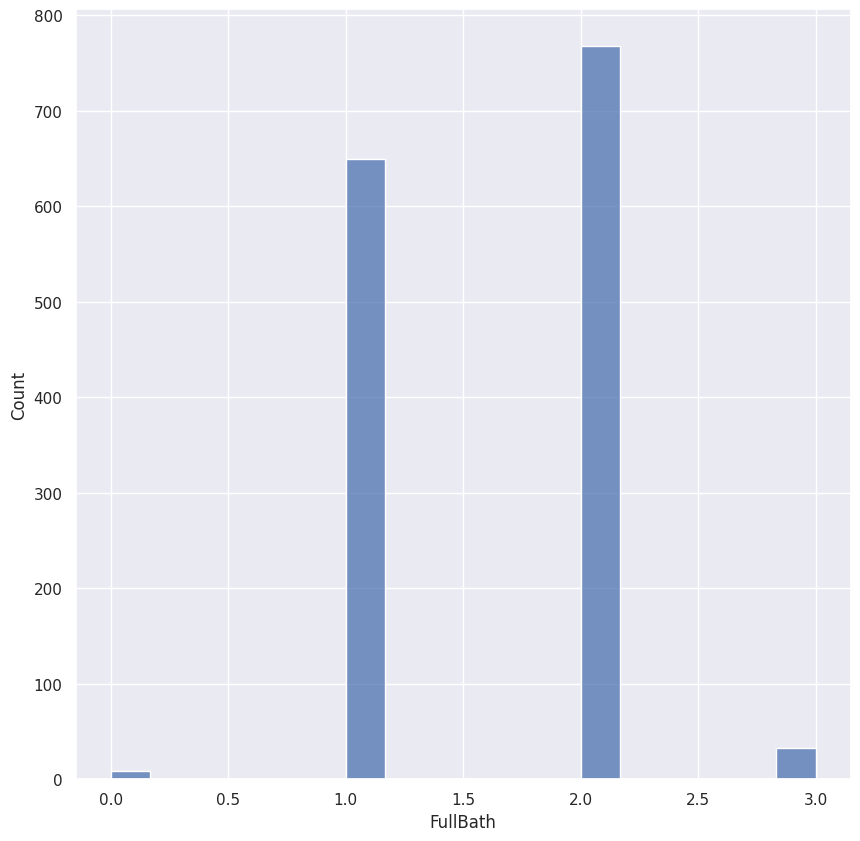

In [55]:
sns.histplot(data=df_train,x='FullBath')

In [56]:
#에러를 발생하는 코드 Example1 -> 에러 원인을 보면서 해결해 봅시다.
sns.histplot(data=train_df,x='FullBath')

NameError: name 'train_df' is not defined

In [ ]:
#에러를 발생하는 코드 Example2 -> 에러 원인을 보면서 해결해 봅시다.
plt.bar(data=df_train,x='FullBath',y='SalePrice')

In [ ]:
#plt.bar(data=df_train,x='FullBath',height='SalePrice')

In [ ]:
# Feature Scaling을 거친 연관관계를 분석해봅시다.
data=df_train.copy()
target = 'WoodDeckSF'

data[target]=np.log(data[target])
# log를 취하는 이유가 뭘까요?
data['SalePrice']=np.log(data['SalePrice'])
# 3차원 그래프를 그려봅시다!
fig = plt.figure(figsize = (15, 12))
ax = plt.axes(projection ="3d")
ax.scatter3D(data[target],data['SalePrice'],color = "tomato")
plt.xlabel(target,fontsize=15)
plt.ylabel('SalesPrice',fontsize = 15)
plt.title(target + " Vs SalePrice",fontsize=22)
plt.grid(color = "palegreen")
plt.show()

# [TO-DO] 실습 #3
아까 함수 만드는 방법을 배웠습니다.  
Continuous Data도 함수로 만들어보고,  
연관관계를 다양하게 분석해봅시다.

In [ ]:
def draw_graph_continuous(target):
  # 연관관계를 분석해봅시다.
  data=df_train.copy()
  data[target]=np.log(data[target])
  # log를 취하는 이유가 뭘까요?
  data['SalePrice']=np.log(data['SalePrice'])
  # 3차원 그래프를 그려봅시다!
  fig = plt.figure(figsize = (8, 8))
  ax = plt.axes(projection ="3d")
  ax.scatter3D(data[target],data['SalePrice'],color = "tomato")
  plt.xlabel(target,fontsize=15)
  plt.ylabel('SalesPrice',fontsize = 15)
  plt.title(target + " Vs SalePrice",fontsize=22)
  plt.grid(color = "palegreen")
  plt.show()

In [ ]:
draw_graph_continuous('WoodDeckSF')

# Categorical Feature (범주형 자료)
# Ex) 지면 높이 (지하, 언덕, 지상, 푹 꺼진 땅) 등등

In [ ]:
# dtype이 Object인 Feature들을 모두 추출(범주형 데이터)
categorical_features=[feature for feature in df_train.columns if data[feature].dtypes=='O']
# 어떤 범주형 데이터가 있는지 볼까요?
len(categorical_features)
# 각 범주형 데이터가 어떤 값을 지니는지, 각각의 데이터가 뭘 의미하는지 ~~를 보고 참고해봅시다.

In [ ]:
categorical_features

In [ ]:
# 메타데이터를 쉽게 볼 수 있도록 미리 함수로 작성해두었습니다.
# 대소문자 구분 안하셔도 됩니다!
# 각 항목의 데이터가 뭘 의미하는지 확인해보세요!
#show_data('SaleCondition')

# 혹은 아래와 같이, for문으로 전체를 출력할 수도 있습니다. (내용이 길 수 있습니다.)
for f in categorical_features:
  show_data(f)

In [57]:
df_train[categorical_features].head().style.set_properties(**{"background-color": "#98FB98","color": "black", "border-color": "black"})

NameError: name 'categorical_features' is not defined

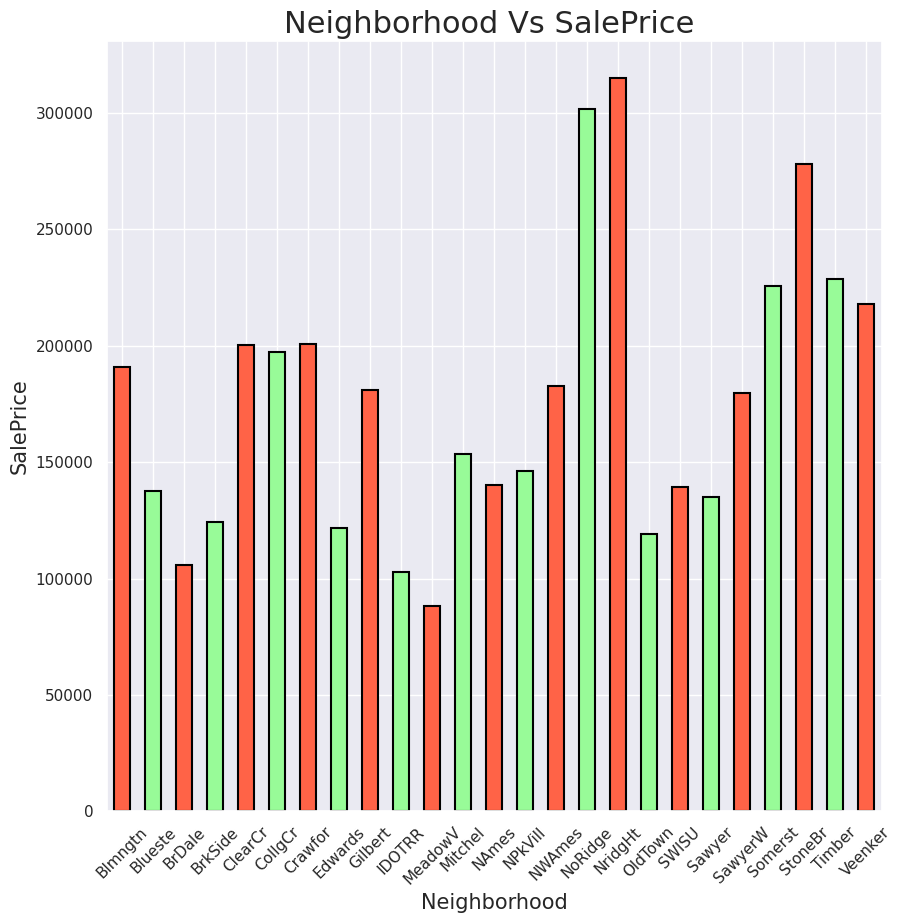

In [58]:
data=df_train.copy()
target = 'Neighborhood' # 중앙 냉난방 시스템 여부
colors = ["#FF6347","#98FB98"]
plt.figure(figsize=(10,10))
data.groupby(target)['SalePrice'].median().plot.bar(color = colors,edgecolor = "black",linewidth = 1.5)
plt.xlabel(target, fontsize = 15)

plt.xticks(rotation=45)
## xticks(rotation)의 각도를 조절해 x축 항목의 각도를 변환시킬 수 있습니다.
plt.ylabel('SalePrice',fontsize = 15)
plt.title(target + " Vs SalePrice ",fontsize = 22)
plt.show()

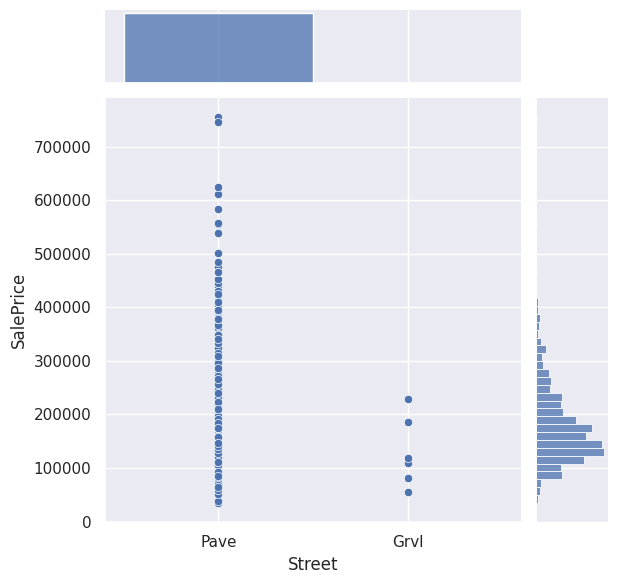

In [59]:
# jointplot, histplot, boxplot그려보기
sns.jointplot(data=df_train,x='Street',y='SalePrice')

In [ ]:
# jointplot, histplot, boxplot그려보기
sns.histplot(data=df_train,x='Street',y='SalePrice')

In [ ]:
categorical_features

# [TO-DO] 실습 #4
함수화 시켜보고, Categorical Data와 가격관의 연관관계를 분석해보세요.

In [ ]:
# 직접 Seaborn 홈페이지를 들어가 어떠한 시각화 함수가 있는지 확인해보고 직접 그려봅시다.
sns.catplot(x="RoofStyle", y="SalePrice", data=df_train)

In [ ]:
sns.jointplot(x="RoofStyle", y="SalePrice", data=df_train)

In [ ]:
## 함수화 (코드)

def draw_categorical(target):
  data=df_train.copy()
  target = target 
  colors = ["#FF6347","#98FB98"]
  plt.figure(figsize=(10,10))
  data.groupby(target)['SalePrice'].median().plot.bar(color = colors,edgecolor = "black",linewidth = 1.5)
  plt.xlabel(target, fontsize = 15)

  plt.xticks(rotation=45)

  plt.ylabel('SalePrice',fontsize = 15)
  plt.title(target + " Vs SalePrice ",fontsize = 22)
  plt.show()

## xticks(rotation)옵션 설명

In [ ]:
## For문 모두 출력 (코드)

for target in categorical_features:
  draw_categorical(target)